In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy.random
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import warnings
import astropy.coordinates as coord
import corner 

from astropy.coordinates import Angle
from scipy.optimize import curve_fit
from astropy import units as u
from astropy.coordinates import SkyCoord
from matplotlib import cm 
from mpl_toolkits.mplot3d import Axes3D
from astropy.io import fits

In [2]:
#sns.set_style('ticks')
sns.set_context('talk')
mpl.style.use('seaborn')
sns.set_context("paper", font_scale=2)
sns.set_style("whitegrid")
warnings.filterwarnings('ignore')

In [3]:
#LECTURA DE LOS DATOS

def DATOSS(df):
    c = SkyCoord(x=np.array(df["x"])*u.kpc,y=np.array(df["y"])*u.kpc,z=np.array(df["z"])*u.kpc,
             v_x=np.array(df["vx"])*u.km/u.s,v_y=np.array(df["vy"])*u.km/u.s,v_z=np.array(df["vz"])*u.km/u.s,
             representation_type='cartesian') 
    c.representation_type = 'cylindrical'
    return c

def DATOS(df):
    c = SkyCoord(x=np.array(df["xX"])*u.kpc,y=np.array(df["xY"])*u.kpc,z=np.array(df["xZ"])*u.kpc,
             v_x=np.array(df["xVX"])*u.km/u.s,v_y=np.array(df["xVY"])*u.km/u.s,v_z=np.array(df["xVZ"])*u.km/u.s,
             representation_type='cartesian') 
    c.representation_type = 'cylindrical'
    return c

In [4]:
Dfsg = pd.read_csv('/Users/maurocabrera/Desktop/Tesis/Computacional/Simulaciones/SineLop/snap_PL_up7.5_down4.25_5p_RC_01.bl00-04.sinelop.ge1.8.csv',delimiter=',')
#df

In [5]:
Dsfsg = pd.read_csv('/Users/maurocabrera/Desktop/Tesis/Computacional/Simulaciones/SineLop/snap_PL_up7.5_down4.25_5p_RC_15.bl00.sinelop.ne.dat',delim_whitespace=True)
#df

In [6]:
sigma=0.07 #REPRESENTA EL PORCENTAJE DE ERROR QUE TENEMOS EN LA DISTANCIA HELIOCENTRICA

In [13]:
#SIMULACION CON FSG
c=DATOS(Dfsg)
corte=2000 #M_tot
Lon=c.phi.radian[:corte] #longitud galactocentrica de las estrellas en radianes revisar

Lon[Lon<0]=Lon[Lon<0]+2*np.pi

R=c.rho.value[:corte]

Z=c.z.value[:corte]

e_Dist_por=sigma*np.ones_like(Z)


In [14]:
#SIMULACION SIN FSG

dsfsg=DATOSS(Dsfsg)

Loncor=dsfsg.phi.radian[:corte] #longitud galactocentrica de las estrellas en radianes revisar

Loncor[Loncor<0]=Loncor[Loncor<0]+2*np.pi
Rcor=dsfsg.rho.value[:corte]

Zcor=dsfsg.z.value[:corte]


e_Dist_por_cor=sigma*np.ones_like(Zcor)



In [9]:
#PARAMETROS DEL AJUSTE

#NUMERO DE ESTRELLAS POR ANILLO

m=100

#Z MAXIMO PARA QUIETAR OUTLIERS

ZMAX=20

#NUMERO DE BINS EN AZIMUT PARA HACER EL SIGMA CARACTERISTICO DEL ANILLO | siempre debe contener estrellas por lo que
#no puede ser muy grande, debe ser mas chico que 

bins=4

#GRAFICOS

varia="$Z$"

univaria="$kpc$"

factor1=100

factor2=10

Poblacion='Sine-Lopsided'

In [10]:
#RADIOS Y DELTARADIOS | DET DE LOS ANILLOS | ingresamos el numero de estrellas por anillo y nos devuelve, 
#los radios y deltas
#RADIOS PARA LA SIMULACION CON FSG

Radios=np.zeros(round(len(R)/m-0.5))

DRadios=np.zeros(round(len(R)/m-0.5))

R.sort()

for i in range(len(Radios)):
    Radios[i]=0.5*(R[i*m]+R[m*(i+1)-1])#el menos uno es para que el ultimo quede para el primero de la proxima iteracion
    DRadios[i]=0.5*(R[m*(i+1)-1]-R[i*m])

print("Estrellas fuera=",len(R[R>Radios[len(Radios)-1]+DRadios[len(Radios)-1]]))

print(Radios+DRadios)

Estrellas fuera= 1
[ 6.48464134  7.05383721  7.53237629  8.09064012  8.63012974  9.25350724
  9.91928212 10.59243804 11.10230656 11.69835752 12.32699842 12.89769052
 13.48023519 14.22675738 14.98202339 15.71184284 16.65319182 17.55045565
 18.58821794 21.48830612]


In [11]:
#RADIOS Y DELTARADIOS | DET DE LOS ANILLOS | ingresamos el numero de estrellas por anillo y nos devuelve, 
#los radios y deltas
#RADIOS PARA LA SIMULACION SIN FSG

Radioscor=np.zeros(round(len(Rcor)/m-0.5))

DRadioscor=np.zeros(round(len(Rcor)/m-0.5))

Rcor.sort()

for i in range(len(Radioscor)):
    Radioscor[i]=0.5*(Rcor[i*m]+Rcor[m*(i+1)-1])#el menos uno es para que el ultimo quede para el primero de la proxima iteracion
    DRadioscor[i]=0.5*(Rcor[m*(i+1)-1]-Rcor[i*m])

print("Estrellas fuera=",len(Rcor[Rcor>Radioscor[len(Radioscor)-1]+DRadioscor[len(Radioscor)-1]]))

print(Radioscor+DRadioscor)

Estrellas fuera= 0
[ 6.2093769   6.66318422  7.12364246  7.55591508  7.94536633  8.33363607
  8.84654098  9.35173016  9.85145878 10.29197563 10.83857711 11.53422342
 12.19130886 12.91123919 13.83086177 14.72547811 15.8018195  16.91804102
 18.22657201 21.42893672]


In [12]:
#RADIOS PROEMDIO DE LOS ANILLOS

mean_Radios=np.zeros(len(Radios))

for i in range(len(Radios)):
    mask_cf=(R>Radios[i]-DRadios[i])&(R<Radios[i]+DRadios[i])
    mean_Radios[i]=np.mean(R[mask_cf])
    
mean_Radioscor=np.zeros(len(Radioscor))

for i in range(len(Radioscor)):
    mask_cfcor=(Rcor>Radioscor[i]-DRadioscor[i])&(Rcor<Radioscor[i]+DRadioscor[i])
    mean_Radioscor[i]=np.mean(Rcor[mask_cfcor])
    

In [15]:
#SIMULACION CON FSG
c=DATOS(Dfsg)
corte=2000 #M_tot
Lon=c.phi.radian[:corte] #longitud galactocentrica de las estrellas en radianes revisar

Lon[Lon<0]=Lon[Lon<0]+2*np.pi

R=c.rho.value[:corte]

Z=c.z.value[:corte]

e_Dist_por=sigma*np.ones_like(Z)
#SIMULACION SIN FSG

dsfsg=DATOSS(Dsfsg)

Loncor=dsfsg.phi.radian[:corte] #longitud galactocentrica de las estrellas en radianes revisar

Loncor[Loncor<0]=Loncor[Loncor<0]+2*np.pi
Rcor=dsfsg.rho.value[:corte]

Zcor=dsfsg.z.value[:corte]


e_Dist_por_cor=sigma*np.ones_like(Zcor)

In [16]:
#FUNCIONES PARA EL AJUSTE Y LA REPRESENTACIÓN DEL AJUSTE PARA N=2

def CURVA2(l,w):
    return w[0]+w[1]*np.cos(l)+w[2]*np.cos(2*l)+w[3]*np.sin(l)+w[4]*np.sin(2*l)


def inout(Radi,Radios):
    return np.argmin(np.abs(Radios-Radi))

#-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-

def SIN2(L,l,Info,n): #CURVA DEL AJUSTE 
    return Info[L,0]*np.sin(-Info[L+n,0])+Info[L,1]*np.sin(l-Info[L+n,1])+Info[L,2]*np.sin(2*l-Info[L+n,2])

#-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-

A=np.zeros(3)   #Aplitudes
Phi=np.zeros(3) #Defasajes

def APhi2(S, C):
    for i in range(3):
        A[i]=np.sqrt((S[i])**2+(C[i])**2)
        Phi[i]=np.arctan2(S[i],C[i])
    return A,Phi 

#-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=       EL AJUSTE        -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-

def AJUSTE2(R,Lon,Z,bins,ZMAX,Radios,DRadios,e_Dist_por): 
    Info=np.zeros(6*len(Radios)).reshape((2*len(Radios), 3)) #array con las A y Phi para cada R        
    G=np.zeros(5*5*len(Radios)).reshape(len(Radios),5,5)
    Amp=np.zeros(5*len(Radios)).reshape((len(Radios), 5))
    SigCarR=np.zeros(len(Radios))
    ZmaxR=np.zeros(len(Radios))
    numero=np.zeros(len(Radios))
    Zmean=np.zeros(len(Radios))
    CHIR=np.zeros(len(Radios))

    for j in range(1,len(Radios)+1):#Este for es para recorrer los anillos 
        
        mask_ringR=(R>=Radios[j-1]-DRadios[j-1])&(R<=Radios[j-1]+DRadios[j-1])&(np.abs(Z)<ZMAX)#&(np.abs(v_Z)<VZMAX)  
        
        Stand_Z=np.zeros(bins)
        for k in range(bins): #CALCULO DEL SIGCAR, TOMA LAS ESTRELLAS POR BIN A ESE RADIO Y PROMEDIA LAS STD DE CADA BIN
            mask_bin=(Lon[mask_ringR]<(k+1)*2*np.pi/bins)&(Lon[mask_ringR]>k*2*np.pi/bins)
            Stand_Z[k]=np.std(Z[mask_ringR][mask_bin])*(len(Z[mask_ringR][mask_bin])/len(Z[mask_ringR]))  
            
        SigCar=np.sum(Stand_Z)
        SigCarR[j-1]=SigCar
        Zmax=np.mean(np.abs(Z[mask_ringR]))+4*SigCar
        ZmaxR[j-1]=Zmax

       #EL SIGMA^2 DEL LIKELIHOOD=ERROR % DE LA DIST POR LA ALTURA ˆ2 + EL SIGMA_CAR DEL ANILLO ˆ2
        mask_ring=mask_ringR&(np.abs(Z)<=ZmaxR[j-1])
        
        numero[j-1]=len(Z[mask_ring])
        z_err=(e_Dist_por[mask_ring]*np.abs(Z[mask_ring]))**2+(SigCar*np.ones_like(Z[mask_ring]))**2
        
        Zmean[j-1]=np.dot(Z[mask_ring],z_err)/np.sum(z_err)
        A=numpy.transpose([np.ones_like(Lon[mask_ring]),np.cos(Lon[mask_ring]),np.cos(2*Lon[mask_ring]),
                           np.sin(Lon[mask_ring]),np.sin(2*Lon[mask_ring])])
        
        ATA = np.dot(np.transpose(A), A/ (z_err)[:, None]) # A^T por AC^-1
        cov = np.linalg.inv(ATA)
        o = np.linalg.solve(ATA, np.dot(A.T, Z[mask_ring]/(z_err)))
        Amp[j-1]=o  #AMPLITUDES LINEALES
        G[j-1]=cov  #MATRIZ DE COVARIANZA        
        S=np.array([0, o[3], o[4]])
        C=np.array([o[0], o[1], o[2]])    
        H=APhi2(-C,S) #AMPLITUDES Y DESFASAJES
        Info[j-1]=H[0]             #AMPLITUDES
        Info[j+len(Radios)-1]=H[1] #DESFASAJES
        suma=0
        for i in range(len(Lon[mask_ring])):
            suma+=((Z[mask_ring][i]-SIN2(j-1,Lon[mask_ring][i],Info,len(Radios)))**2)/z_err[i]            
        CHIR[j-1]=(1/(numero[j-1]-5))*suma
        
    return Info,G,Amp,SigCarR,ZmaxR,numero,Zmean,CHIR

In [31]:
#FUNCIONES PARA EL AJUSTE Y LA REPRESENTACIÓN DEL AJUSTE PARA N=1


def CURVA2(l,w):
    return w[0]+w[1]*np.cos(l)+w[2]*np.sin(l)


def inout(Radi,Radios):
    return np.argmin(np.abs(Radios-Radi))

#-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-

def SIN2(L,l,Info,n): #CURVA DEL AJUSTE 
    return Info[L,0]*np.sin(-Info[L+n,0])+Info[L,1]*np.sin(l-Info[L+n,1])#+Info[L,2]*np.sin(2*l-Info[L+n,2])

#-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-

A=np.zeros(2)   #Aplitudes
Phi=np.zeros(2) #Defasajes

def APhi2(S, C):
    for i in range(2):
        A[i]=np.sqrt((S[i])**2+(C[i])**2)
        Phi[i]=np.arctan2(S[i],C[i])
    return A,Phi 
#-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-

#con vector de errores


def AJUSTE2(R,Lon,Z,bins,ZMAX,Radios,DRadios,e_Dist_por): 
    Info=np.zeros(4*len(Radios)).reshape((2*len(Radios), 2)) #array con las A y Phi para cada R        
    G=np.zeros(3*3*len(Radios)).reshape(len(Radios),3,3)
    Amp=np.zeros(3*len(Radios)).reshape((len(Radios), 3))
    SigCarR=np.zeros(len(Radios))
    ZmaxR=np.zeros(len(Radios))
    numero=np.zeros(len(Radios))
    Zmean=np.zeros(len(Radios))
    CHIR=np.zeros(len(Radios))
    
    for j in range(1,len(Radios)+1):#TIENE QUE EMPEZAR DESDE UN LUGAR QUE TENGA UNA DENSIDAD ESTELAR QUE LE PERMITA AJUSTAR 
        mask_ringR=(R>=Radios[j-1]-DRadios[j-1])&(R<=Radios[j-1]+DRadios[j-1])&(np.abs(Z)<ZMAX)#&(np.abs(v_Z)<VZMAX)  
        
        Stand_Z=np.zeros(bins)
        for k in range(bins): #CALCULO DEL SIGCAR, TOMA LAS ESTRELLAS POR BIN A ESE RADIO Y PROMEDIA LAS STD DE CADA BIN
            mask_bin=(Lon[mask_ringR]<(k+1)*2*np.pi/bins)&(Lon[mask_ringR]>k*2*np.pi/bins)
            Stand_Z[k]=np.std(Z[mask_ringR][mask_bin])*(len(Z[mask_ringR][mask_bin])/len(Z[mask_ringR]))  
            
        SigCar=np.sum(Stand_Z)
        SigCarR[j-1]=SigCar
        Zmax=np.mean(np.abs(Z[mask_ringR]))+4*SigCar
        ZmaxR[j-1]=Zmax

       #EL SIGMA^2 DEL LIKELIHOOD=ERROR % DE LA DIST POR LA ALTURA ˆ2 + EL SIGMA_CAR DEL ANILLO ˆ2
        mask_ring=mask_ringR&(np.abs(Z)<=ZmaxR[j-1])
        
        numero[j-1]=len(Z[mask_ring])
        z_err=(e_Dist_por[mask_ring]*np.abs(Z[mask_ring]-0.027))**2+(SigCar*np.ones_like(Z[mask_ring]))**2
        
        Zmean[j-1]=np.dot(Z[mask_ring],z_err)/np.sum(z_err)
        A=numpy.transpose([np.ones_like(Lon[mask_ring]),np.cos(Lon[mask_ring]),
                           np.sin(Lon[mask_ring])])
        
        ATA = np.dot(np.transpose(A), A/ (z_err)[:, None]) # A^T por AC^-1
        cov = np.linalg.inv(ATA)
        o = np.linalg.solve(ATA, np.dot(A.T, Z[mask_ring]/(z_err)))
        Amp[j-1]=o  #AMPLITUDES LINEALES
        G[j-1]=cov  #MATRIZ DE COVARIANZA
        
        S=np.array([0, o[2]])
        C=np.array([o[0], o[1]])    
        H=APhi2(-C,S) #AMPLITUDES Y DESFASAJES
        Info[j-1]=H[0]             #AMPLITUDES
        Info[j+len(Radios)-1]=H[1] #DESFASAJES
        suma=0
        for i in range(len(Lon[mask_ring])):
            suma+=((Z[mask_ring][i]-SIN2(j-1,Lon[mask_ring][i],Info,len(Radios)))**2)/z_err[i]            
        CHIR[j-1]=(1/(numero[j-1]-3))*suma
    return Info,G,Amp,SigCarR,ZmaxR,numero,Zmean,CHIR

Corremos el ajuste

In [32]:
# CON FSG

#-+-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-+-

Info_full=AJUSTE2(R,Lon,Z,bins,ZMAX,Radios,DRadios,e_Dist_por)[0]

#-+-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-+-

COV=AJUSTE2(R,Lon,Z,bins,ZMAX,Radios,DRadios,e_Dist_por)[1]

#-+-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-+-

Amp=AJUSTE2(R,Lon,Z,bins,ZMAX,Radios,DRadios,e_Dist_por)[2]

#-+-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-+-

SigCarR=AJUSTE2(R,Lon,Z,bins,ZMAX,Radios,DRadios,e_Dist_por)[3]

#-+-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-+-

Zmaxx=AJUSTE2(R,Lon,Z,bins,ZMAX,Radios,DRadios,e_Dist_por)[4]

#-+-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-+-

Numero=AJUSTE2(R,Lon,Z,bins,ZMAX,Radios,DRadios,e_Dist_por)[5]

#-+-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-+-

Zmean=AJUSTE2(R,Lon,Z,bins,ZMAX,Radios,DRadios,e_Dist_por)[6]

#-+-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-+-

CHIR=AJUSTE2(R,Lon,Z,bins,ZMAX,Radios,DRadios,e_Dist_por)[7]

#-+-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-+-

In [33]:
#SIN FSG


#-+-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-+-

Info_full_cor=AJUSTE2(Rcor,Loncor,Zcor,bins,ZMAX,Radioscor,DRadioscor,e_Dist_por_cor)[0]

#-+-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-+-

COV_cor=AJUSTE2(Rcor,Loncor,Zcor,bins,ZMAX,Radioscor,DRadioscor,e_Dist_por_cor)[1]

#-+-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-+-

Amp_cor=AJUSTE2(Rcor,Loncor,Zcor,bins,ZMAX,Radioscor,DRadioscor,e_Dist_por_cor)[2]

#-+-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-+-

SigCarR_cor=AJUSTE2(Rcor,Loncor,Zcor,bins,ZMAX,Radioscor,DRadioscor,e_Dist_por_cor)[3]

#-+-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-+-

Zmaxx_cor=AJUSTE2(Rcor,Loncor,Zcor,bins,ZMAX,Radioscor,DRadioscor,e_Dist_por_cor)[4]

#-+-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-+-

Numero_cor=AJUSTE2(Rcor,Loncor,Zcor,bins,ZMAX,Radioscor,DRadioscor,e_Dist_por_cor)[5]

#-+-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-+-

Zmean_cor=AJUSTE2(Rcor,Loncor,Zcor,bins,ZMAX,Radioscor,DRadioscor,e_Dist_por_cor)[6]

#-+-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-+-

CHIR_cor=AJUSTE2(Rcor,Loncor,Zcor,bins,ZMAX,Radioscor,DRadioscor,e_Dist_por_cor)[7]

#-+-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-=-=-*-+-

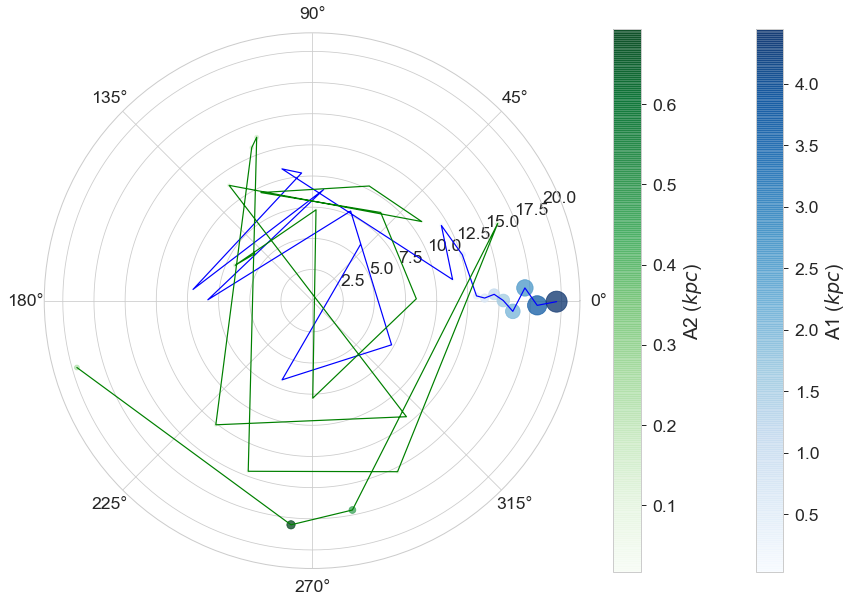

In [26]:
#CON FSG

Rmax=np.max(Radios)
n=len(Radios)
#AMPLITUDES EN FUNCION DE R
A0=np.zeros(n)
A1=np.zeros(n)
A2=np.zeros(n)
r=np.linspace(0,Rmax,n)

for t in range(n):
    A0[t]=Info_full_cor[t][0]
    A1[t]=Info_full_cor[t][1]
    A2[t]=Info_full_cor[t][2]
    
#FASE EN FUNCION DE R
P0=np.zeros(n)
P1=np.zeros(n)
P2=np.zeros(n)
x=np.linspace(0,Rmax,n)

for t in range(n):
    P0[t]=Info_full_cor[t+n][0]
    P1[t]=Info_full_cor[t+n][1]
    P2[t]=Info_full_cor[t+n][2]

plt.figure(figsize=(15, 10))
ax = plt.subplot(111, projection='polar')
    
Modo1 = ax.scatter(P1, mean_Radios, c=A1,s=factor1*A1, cmap='Blues', alpha=0.75)
plt.colorbar(Modo1, ax=ax,label=f"A1 ({univaria})")

Modo2 = ax.scatter(P2, mean_Radios, c=A2,s=factor1*A2, cmap='Greens', alpha=0.75)
plt.colorbar(Modo2, ax=ax,label=f"A2 ({univaria})")

ax.plot(P1, mean_Radios, 'b-')
ax.plot(P2, mean_Radios, 'g-')
ax.set_rmax(Rmax+DRadios[len(Radios)-1])
#plt.savefig('/Users/maurocabrera/Desktop/Tesis/Imagenes/CEFEIDAS/2_modos/fase_amplitud_polar', dpi=150, quality=40)

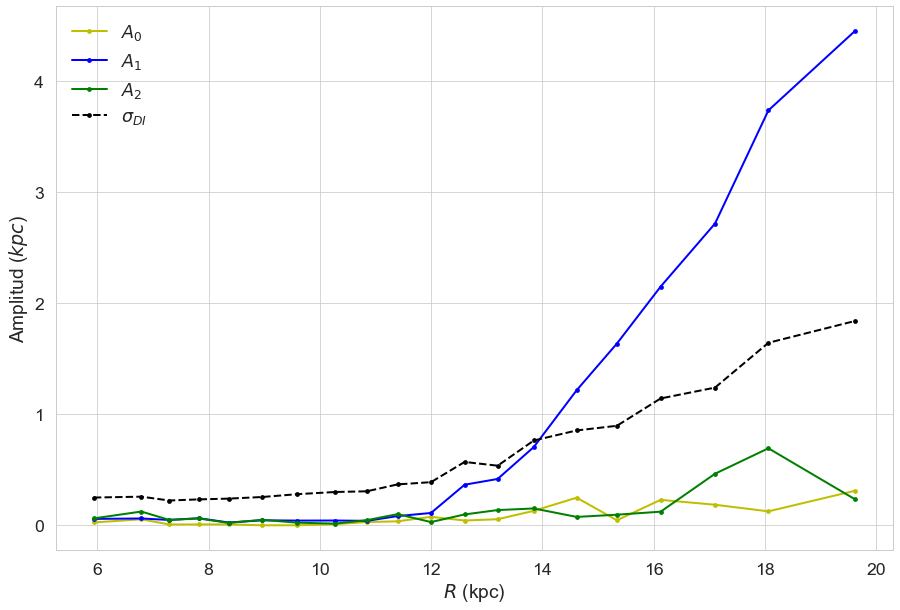

In [27]:
#CON FSG

plt.figure(figsize=(15, 10))
plt.plot(mean_Radios, A0, 'y-o', label=f"$A_0$", lw=2)

plt.plot(mean_Radios, A1, 'b-o', label=f"$A_1$", lw=2)

plt.plot(mean_Radios, A2, 'g-o', label=f"$A_2$", lw=2)

plt.plot(mean_Radios, SigCarR, 'k--o', label=r"$\sigma_{DI}$", lw=2)


plt.xlabel('$R$ (kpc)')
plt.ylabel(f'Amplitud ({univaria})')
plt.legend()
#plt.savefig('/Users/maurocabrera/Desktop/Tesis/Imagenes/CEFEIDAS/2_modos/AmplitudesdR', dpi=150, quality=40)

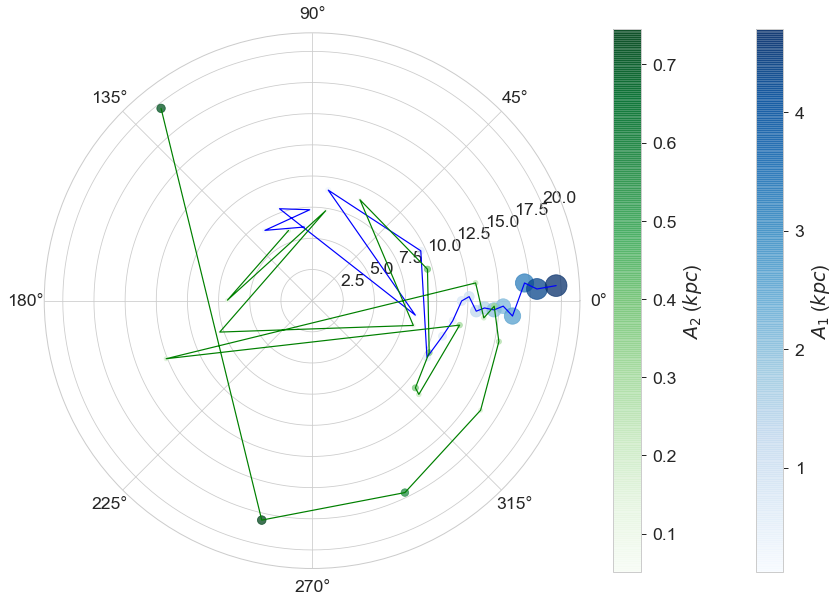

In [28]:
#SIN FSG

Rmax=np.max(Radios)
n=len(Radios)
#AMPLITUDES EN FUNCION DE R
A0=np.zeros(n)
A1=np.zeros(n)
A2=np.zeros(n)
r=np.linspace(0,Rmax,n)

for t in range(n):
    A0[t]=Info_full[t][0]
    A1[t]=Info_full[t][1]
    A2[t]=Info_full[t][2]
    
#FASE EN FUNCION DE R
P0=np.zeros(n)
P1=np.zeros(n)
P2=np.zeros(n)
x=np.linspace(0,Rmax,n)

for t in range(n):
    P0[t]=Info_full[t+n][0]
    P1[t]=Info_full[t+n][1]
    P2[t]=Info_full[t+n][2]

plt.figure(figsize=(15, 10))
ax = plt.subplot(111, projection='polar')
    
Modo1 = ax.scatter(P1, mean_Radios, c=A1,s=factor1*A1, cmap='Blues', alpha=0.75)
plt.colorbar(Modo1, ax=ax,label=f"$A_1$ ({univaria})")

Modo2 = ax.scatter(P2, mean_Radios, c=A2,s=factor1*A2, cmap='Greens', alpha=0.75)
plt.colorbar(Modo2, ax=ax,label=f"$A_2$ ({univaria})")

ax.plot(P1, mean_Radios, 'b-')
ax.plot(P2, mean_Radios, 'g-')
ax.set_rmax(Rmax+DRadios[len(Radios)-1])
#plt.savefig('/Users/maurocabrera/Desktop/Tesis/Imagenes/CEFEIDAS/2_modos/fase_amplitud_polar', dpi=150, quality=40)

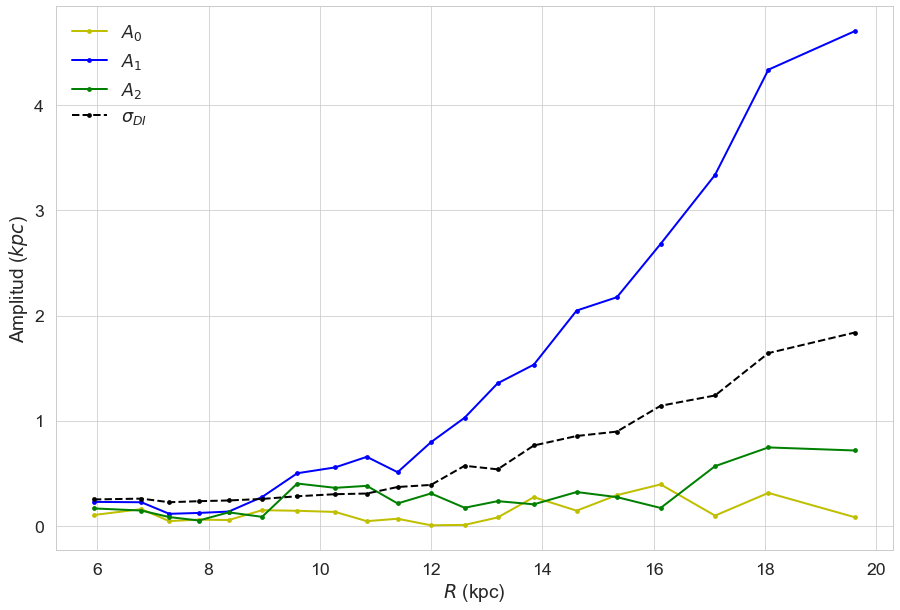

In [29]:
#SIN FSG

plt.figure(figsize=(15, 10))
plt.plot(mean_Radios, A0, 'y-o', label=f"$A_0$", lw=2)

plt.plot(mean_Radios, A1, 'b-o', label=f"$A_1$", lw=2)

plt.plot(mean_Radios, A2, 'g-o', label=f"$A_2$", lw=2)

plt.plot(mean_Radios, SigCarR, 'k--o', label=r"$\sigma_{DI}$", lw=2)

plt.xlabel('$R$ (kpc)')
plt.ylabel(f'Amplitud ({univaria})')
plt.legend()
#plt.savefig('/Users/maurocabrera/Desktop/Tesis/Imagenes/CEFEIDAS/2_modos/AmplitudesdR', dpi=150, quality=40)

In [34]:

def CHIRe(R,Lon,Z,bins,ZMAX,Radios,DRadios,e_Dist_por,Info_full,N):
    CHIR=np.zeros(len(Radios))
    #Info_full=AJUSTE2(R,Lon,Z,bins,ZMAX,Radios,DRadios,e_Dist_por)[0]
    Stand_Z=np.zeros(bins)
    ZmaxR=np.zeros(len(Radios))
    numero=np.zeros(len(Radios))
    for j in range(1,len(Radios)+1):
        mask_ringR=(R>=Radios[j-1]-DRadios[j-1])&(R<=Radios[j-1]+DRadios[j-1])&(np.abs(Z)<ZMAX)#&(np.abs(v_Z)<VZMAX)      

        for k in range(bins): #CALCULO DEL SIGCAR, TOMA LAS ESTRELLAS POR BIN A ESE RADIO Y PROMEDIA LAS STD DE CADA BIN
            mask_bin=(Lon[mask_ringR]<(k+1)*2*np.pi/bins)&(Lon[mask_ringR]>k*2*np.pi/bins)
            Stand_Z[k]=np.std(Z[mask_ringR][mask_bin])*(len(Z[mask_ringR][mask_bin])/len(Z[mask_ringR]))  

        SigCar=np.sum(Stand_Z)
        SigCarR[j-1]=SigCar
        Zmax=np.mean(np.abs(Z[mask_ringR]))+4*SigCar
        ZmaxR[j-1]=Zmax
        mask_ring=mask_ringR&(np.abs(Z)<=ZmaxR[j-1])
        numero[j-1]=len(Z[mask_ring])
        z_err=(e_Dist_por[mask_ring]*np.abs(Z[mask_ring]-0.027))**2+(SigCar*np.ones_like(Z[mask_ring]))**2
        suma=0
        for i in range(len(Lon[mask_ring])):
            suma+=((Z[mask_ring][i]-SIN2(j-1,Lon[mask_ring][i],Info_full,len(Radios)))**2)/z_err[i]            
        CHIR[j-1]=(1/(numero[j-1]-2*N-1))*suma
    return CHIR

In [30]:
Chircor2=CHIRe(Rcor,Loncor,Zcor,bins,ZMAX,Radioscor,DRadioscor,e_Dist_por_cor,Info_full,2) 

In [35]:
Chircor1=CHIRe(Rcor,Loncor,Zcor,bins,ZMAX,Radioscor,DRadioscor,e_Dist_por_cor,Info_full,2) 

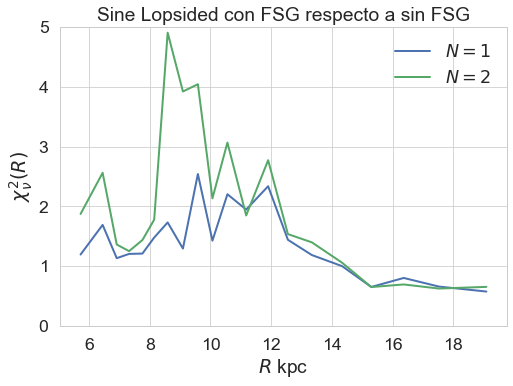

In [36]:
plt.plot(mean_Radioscor,Chircor1,label='$N=1$',lw=2) 

plt.plot(mean_Radioscor,Chircor2,label='$N=2$',lw=2) 
plt.ylabel(r"$\chi^2_\nu(R)$") 
plt.xlabel("$R$ kpc") 
plt.title("Sine Lopsided con FSG respecto a sin FSG") 
plt.ylim(0,5)
plt.legend()